In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 400
# use ggplot
plt.style.use('ggplot')

## Figure 2

In [3]:
sizes = pd.read_csv('../../mutation-testing/data/project_sizes_lines.csv')

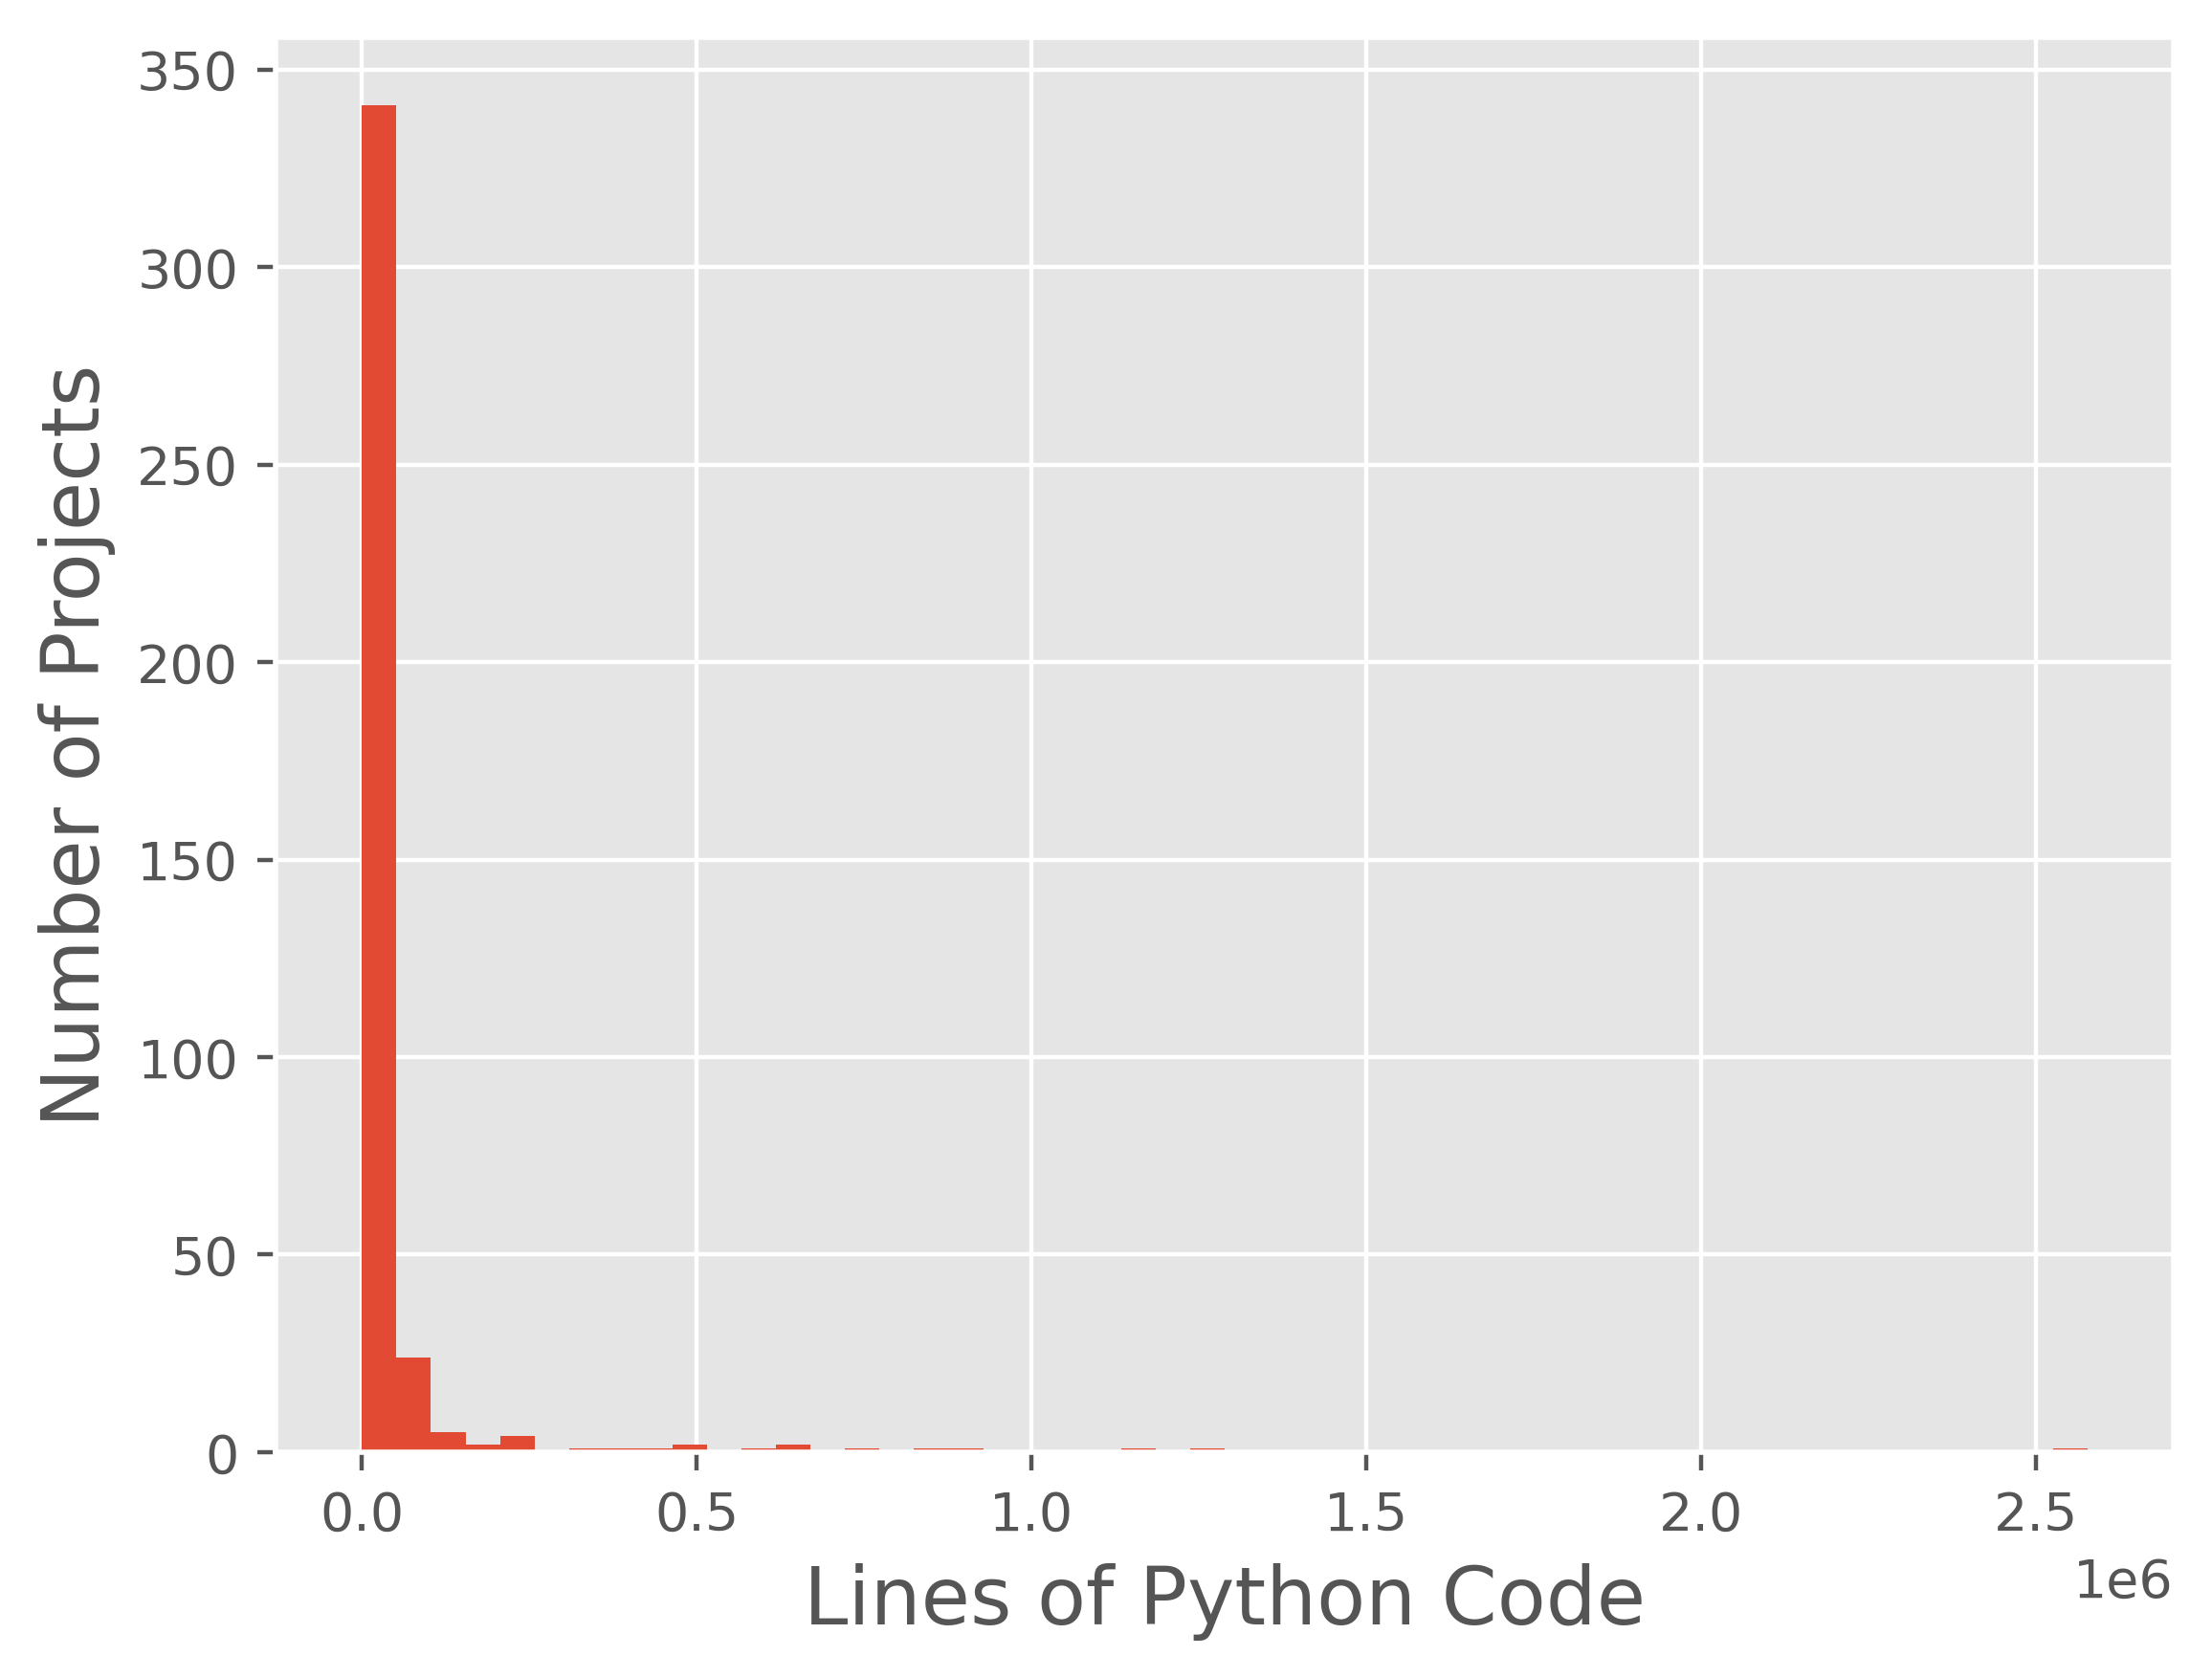

In [4]:
plt.xlabel('Lines of Python Code', fontdict={'size': 15})
plt.ylabel('Number of Projects', fontdict={'size': 15})
sizes['loc'].hist(bins=50)
plt.show()

## Table 2

In [10]:
# tested_projects = ["aiosmtplib", "anonlink", "argon2-cffi", "attrs", "barva", "BIGSI", "buku", "cdflib", 
#                     "chalice", "chocolate", "chopsticks", "Ciw", "clkhash", "cloudformation-cli-python-plugin",  "corrscope", "cryptoconditions",
#                     "cyberpandas", "dataclasses-json", "datacube-core", "datatyping", "dc_stat_think", "dpath-python", "dsntnn", "dvrip", 
#                     "elm-ops-tooling", "eth-keys", "ExoData", "fklearn", "forgi", "framewirc", "fuzzywuzzy", "geovoronoi", "glue", "h2", 
#                     "habitipy", "Harmonbot", "hissp", "hpack", "hyperdome", "hyperlink"]

tested_projects = ["buku", "Harmonbot", "habitipy", "hyperdome", "anonlink", "argon2-cffi", "clkhash", "cryptoconditions", "eth-keys", "elm-ops-tooling", "hissp", "attrs", "datatyping", "dataclasses-json", "chocolate", "dsntnn", "fklearn", "aiosmtplib", "framewirc", "h2", "hpack", "dvrip", "BIGSI", "cdflib", "forgi", "Ciw", "ExoData", "datacube-core", "fuzzywuzzy", "cyberpandas", "dpath-python", "hyperlink", "cloudformation-cli-python-plugin", "dc_stat_think", "chalice", "chopsticks", "barva", "corrscope", "geovoronoi", "glue"]

detections_cols = ['roundtrip',
                    'partial_roundtrip', 'commutative', 'const_eq', 'const_inclusion',
                    'inclusion', 'typecheck', 'const_bounds', 'gen_val_bounds', 'exception',
                    'const_neq', 'gen_val_neq']


tested_detections = pd.read_csv("../../mutation-testing/data/tested_detections.csv")

In [6]:
results = pd.read_csv("../../mutation-testing/data/results_w_cov_test.csv")

In [7]:
results

,mutation,killed?,function,coverage_percent,roundtrip,partial_roundtrip,commutative,const_eq,const_inclusion,inclusion,typecheck,const_bounds,gen_val_bounds,exception,const_neq,gen_val_neq,unit
0,0_aiosmtplib,True,test_login_all_methods_fail_raises_error,93,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0_aiosmtplib,False,unit_0,93,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,0_aiosmtplib,False,unit_1,93,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,0_aiosmtplib,False,unit_2,93,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,0_aiosmtplib,False,unit_3,93,0,0,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936565,99_hyperlink,False,pbt_3,94,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1936566,99_hyperlink,False,pbt_4,94,0,0,0,0,0,0,0,0,1,0,0,0,NaN
1936567,99_hyperlink,False,pbt_5,94,0,0,0,1,0,0,0,0,0,0,0,0,NaN
1936568,99_hyperlink,False,pbt_6,94,0,0,0,0,0,0,1,0,0,0,0,0,NaN


In [11]:
print("Project, Number of mutations killed by unit test, number of mutations killed by PBT, total mutations killed")
for proj in tested_projects:
    # proj = "ExoData"
    proj_results = results[results["mutation"].str.endswith(proj) & results["killed?"] == True].groupby("mutation").sum()
    for col in detections_cols:
        proj_results[col] = proj_results[col].apply(lambda x: 1 if x > 0 else 0)
    # merge detection columns together
    proj_results["pbts"] = proj_results[detections_cols].sum(axis=1)
    proj_results["pbts"] = proj_results["pbts"].apply(lambda x: 1 if x > 0 else 0)
    proj_results["unit"] = proj_results["unit"].apply(lambda x: 1 if x > 0 else 0)
    if proj == "ExoData":
        # fill in uncategorized pbt
        proj_results.loc[proj_results["function"].str.contains("test_can_derive_other_vars_from_one_calculated"), 'pbts'] = 1
    num_mut_killed_by_unit = proj_results["unit"].sum()
    num_mut_killed_by_pbt = proj_results["pbts"].sum()
    num_mut_killed_by_both = proj_results[(proj_results["unit"] == 1) & (proj_results["pbts"] == 1)].shape[0]

    print(proj, num_mut_killed_by_unit, num_mut_killed_by_pbt, num_mut_killed_by_unit + num_mut_killed_by_pbt - num_mut_killed_by_both)

Project, Number of mutations killed by unit test, number of mutations killed by PBT, total mutations killed
buku 20 0 20
Harmonbot 1 1 2
habitipy 12 10 16
hyperdome 8 7 9
anonlink 21 51 63
argon2-cffi 55 8 55
clkhash 57 4 58
cryptoconditions 57 3 60
eth-keys 27 17 34
elm-ops-tooling 27 13 34
hissp 8 0 8
attrs 45 9 47
datatyping 15 50 52
dataclasses-json 47 0 47
chocolate 25 18 28
dsntnn 94 0 94
fklearn 42 0 42
aiosmtplib 34 1 34
framewirc 37 8 37
h2 37 4 38
hpack 9 29 32
dvrip 18 6 20
BIGSI 3 0 3
cdflib 31 5 32
forgi 19 0 19
Ciw 75 1 76
ExoData 47 11 53
datacube-core 0.0 0 0.0
fuzzywuzzy 27 69 71
cyberpandas 26 0 26
dpath-python 52 13 53
hyperlink 51 43 68
cloudformation-cli-python-plugin 45 8 53
dc_stat_think 22 32 41
chalice 62 0 62
chopsticks 96 2 96
barva 2 1 3
corrscope 11 1 11
geovoronoi 36 42 48
glue 64 0 64


In [9]:
total_num_tests = pd.read_csv('../../mutation-testing/data/total_tests.csv')
total_num_tests

,project_name,total_num_tests
0,aiosmtplib,358
1,anonlink,9058
2,argon2-cffi,75
3,attrs,1330
4,barva,2
5,BIGSI,28
6,buku,1169
7,cdflib,60
8,chalice,1419
9,chocolate,128


In [ ]:
gb_func = tested_detections.groupby(['project_name', 'namespace', 'function']).sum().reset_index()
gb_func = gb_func[['project_name', 'function']]
# gb_func['project_name']
for tp in tested_projects:
    print(tp, len(gb_func[gb_func['project_name'].eq(tp)]), len(gb_func[gb_func['project_name'].eq(tp)])/int(total_num_tests[total_num_tests['project_name'].eq(tp)]['total_num_tests'])*100)
    

aiosmtplib 8 2.2346368715083798
anonlink 17 0.18767939942592185
argon2-cffi 2 2.666666666666667
attrs 26 1.954887218045113
barva 1 50.0
BIGSI 1 3.571428571428571
buku 1 0.0855431993156544
cdflib 3 5.0
chalice 3 0.21141649048625794
chocolate 5 3.90625
chopsticks 1 2.631578947368421
Ciw 21 6.363636363636363
clkhash 12 8.51063829787234
cloudformation-cli-python-plugin 9 5.660377358490567
corrscope 4 1.2903225806451613
cryptoconditions 5 1.1764705882352942
cyberpandas 1 0.9523809523809524
dataclasses-json 1 0.3048780487804878
datacube-core 4 0.4250797024442083
datatyping 21 55.26315789473685
dc_stat_think 16 61.53846153846154
dpath-python 15 18.9873417721519
dsntnn 1 2.7777777777777777
dvrip 68 54.400000000000006
elm-ops-tooling 2 33.33333333333333
eth-keys 9 14.516129032258066
ExoData 1 0.5494505494505495
fklearn 1 0.5813953488372093
forgi 4 0.7130124777183601
framewirc 1 0.7352941176470588
fuzzywuzzy 2 2.8169014084507045
geovoronoi 3 6.976744186046512
glue 1 0.07178750897343862
h2 16 1.1

/var/folders/lh/fb5_j_hj7314br3ys3f8wt5h0000gn/T/ipykernel_49177/3918804270.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(tp, len(gb_func[gb_func['project_name'].eq(tp)]), len(gb_func[gb_func['project_name'].eq(tp)])/int(total_num_tests[total_num_tests['project_name'].eq(tp)]['total_num_tests'])*100)


## Table 3
- from JMP

## Figure 21

[]

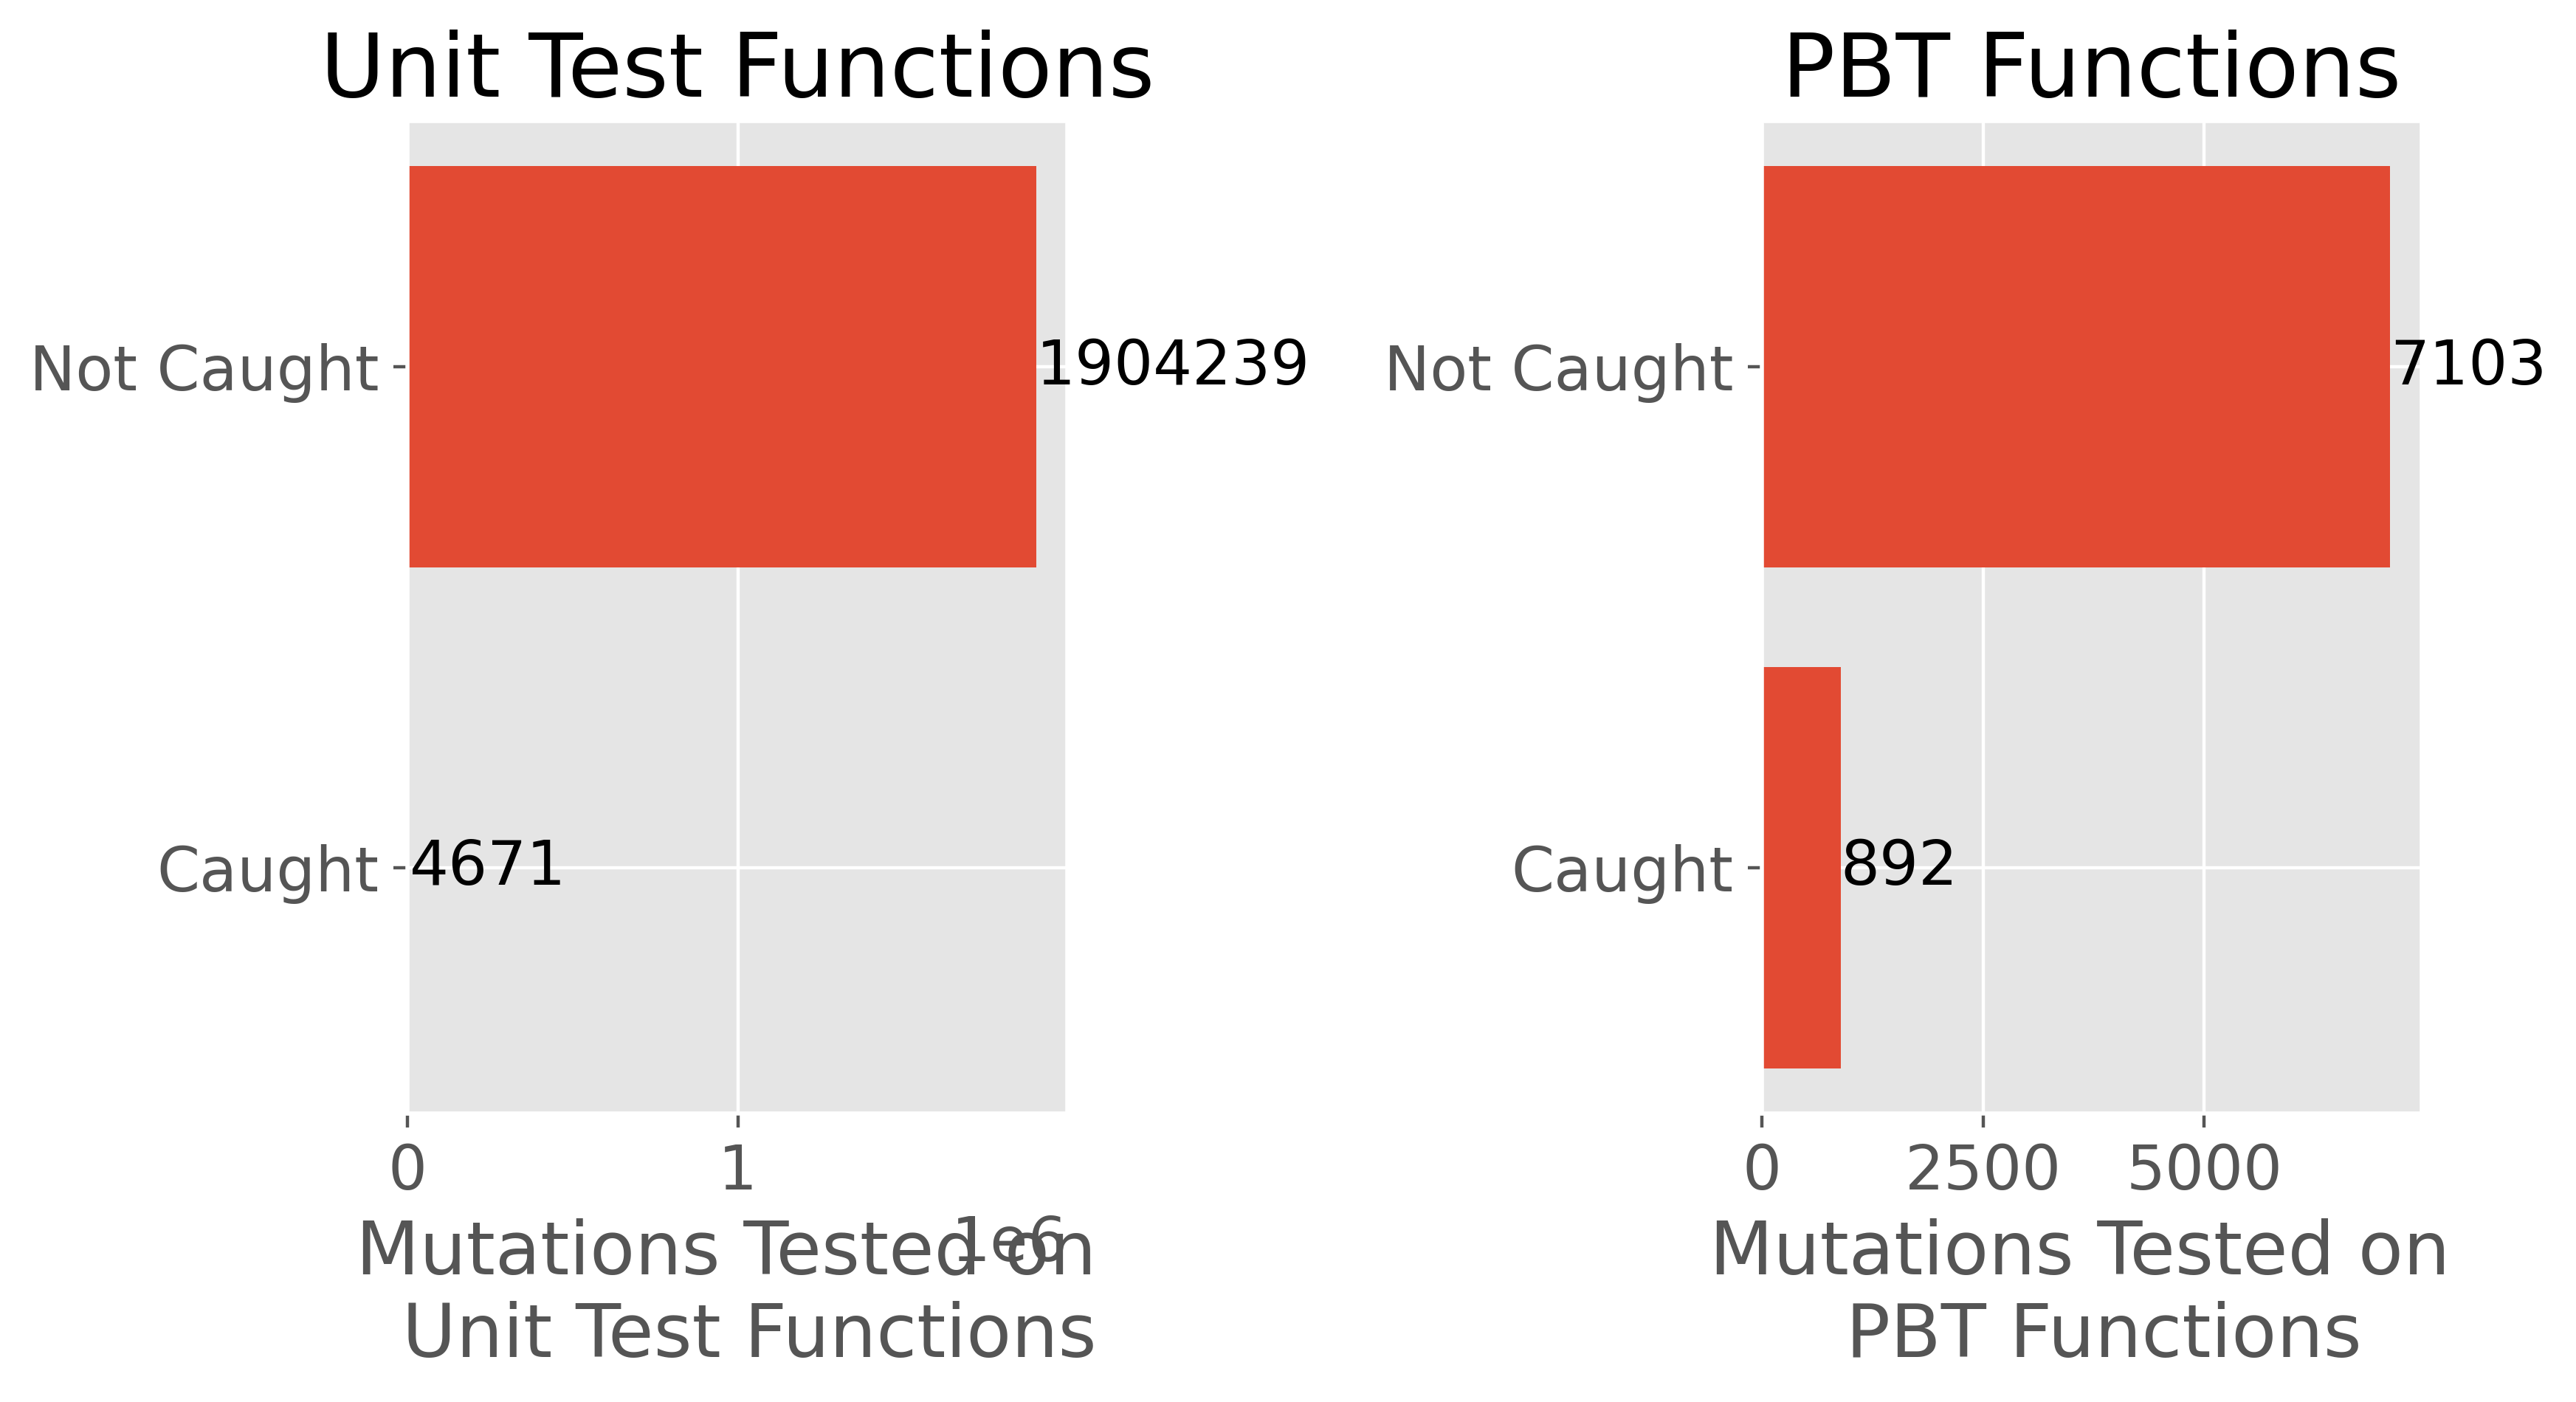

In [ ]:
res = pd.read_csv("../../mutation-testing/data/results_w_cov_test.csv")
fig, ax = plt.subplots(1,2, figsize=(9, 5))
plt.subplots_adjust(wspace=2, hspace=2)

# fig.suptitle('Distribution of Mutations Tested \n on Unit Test and PBT Functions', size=16, ha='center')
unit_dist = ax[0].barh(["Caught", "Not Caught"],[len(res[res['killed?'].eq(True) & res['unit'].eq(1)]), len(res[res['killed?'].eq(False) & res['unit'].eq(1)])])
# unit_dist.set_ylabel("Number of Mutations Tested on Functions")
ax[0].bar_label(container=unit_dist, fmt='%.0f')
ax[0].set_xlabel("Mutations Tested on \n Unit Test Functions")
ax[0].set_title("Unit Test Functions")
pbt_dist = ax[1].barh(["Caught", "Not Caught"],[len(res[res['killed?'].eq(True) & res['unit'].eq(0)]), len(res[res['killed?'].eq(False) & res['unit'].eq(0)])])
# unit_dist.set_ylabel("Number of Mutations Tested on Functions")
ax[1].bar_label(container=pbt_dist, fmt='%.0f')
ax[1].set_xlabel("Mutations Tested on \n PBT Functions")
ax[1].set_title('PBT Functions')
fig.tight_layout()
# fig.subplots_adjust(top=1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.plot()

## Table 4
- from JMP

## Figure 22

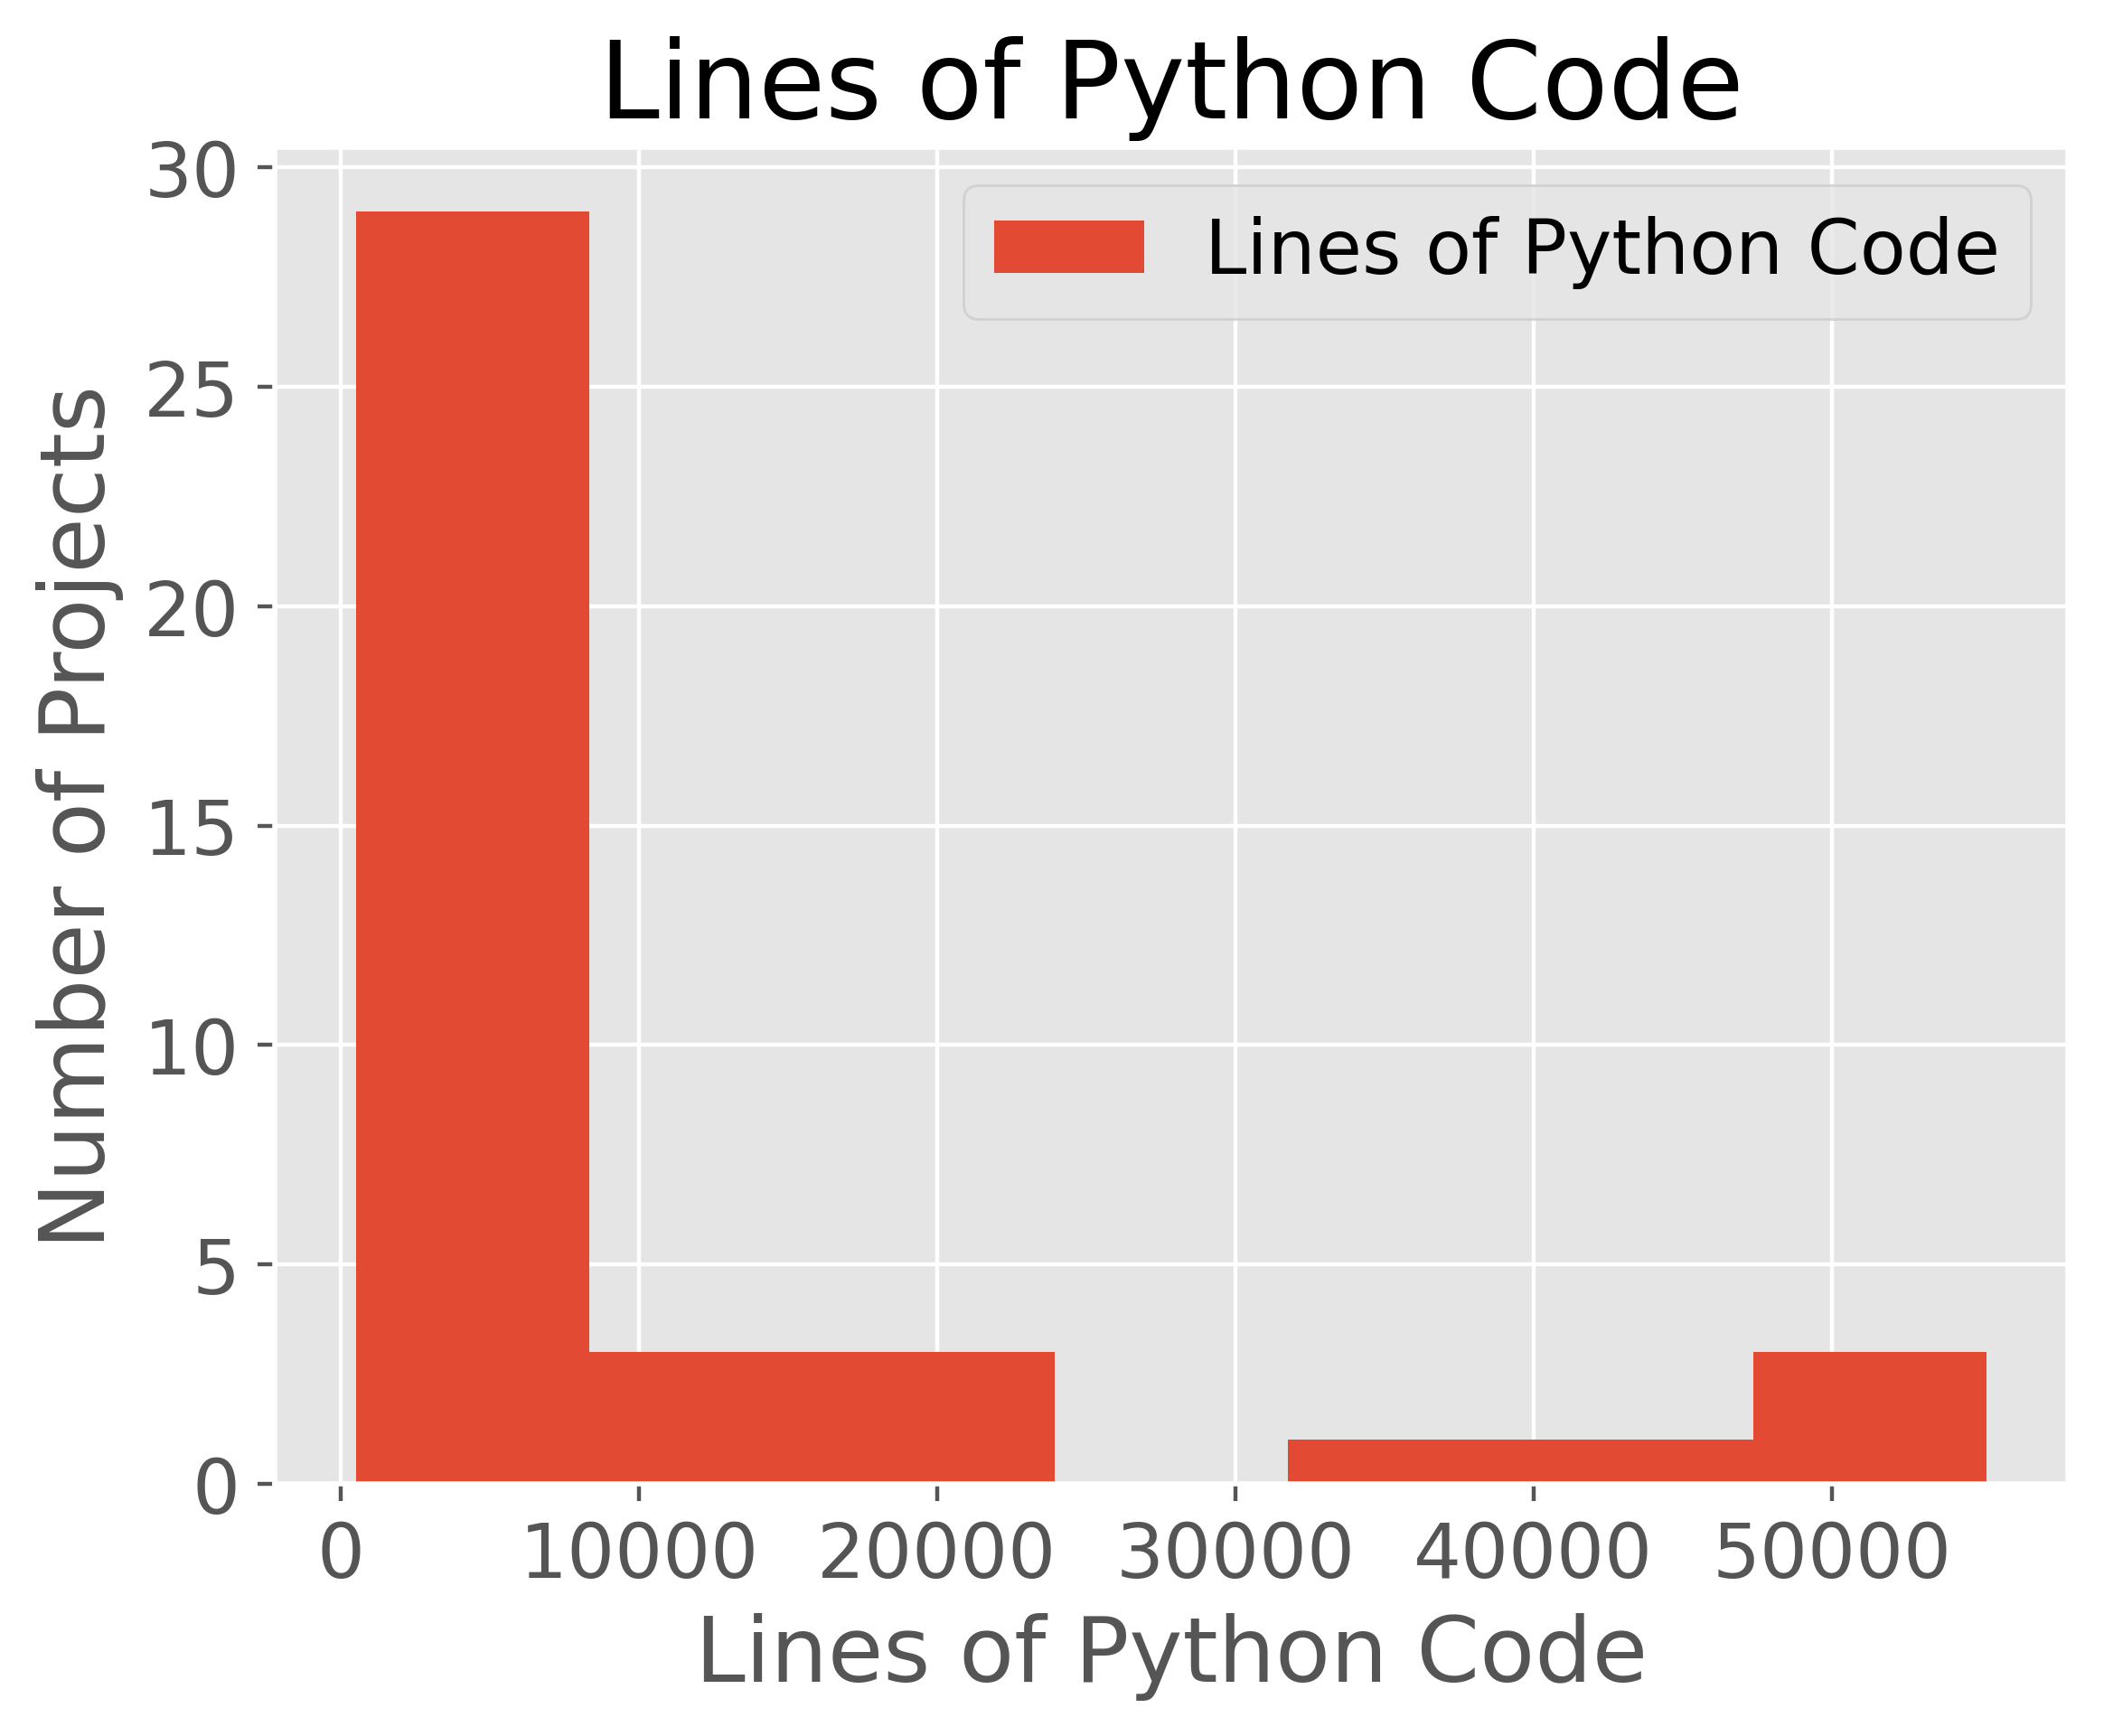

In [ ]:
loc = pd.read_csv("../../mutation-testing/data/loc.txt", skipinitialspace=True)
plt.rcParams.update({'font.size': 15})

fig, axes = plt.subplots(nrows=1, ncols=1)
axarr = loc.hist(legend=True, ax=axes, bins=7)
for ax in axarr.flatten():
    ax.set_xlabel("Lines of Python Code")
    ax.set_ylabel("Number of Projects")


## Figure 23

<Axes: xlabel='Category', ylabel='Odds Ratio'>

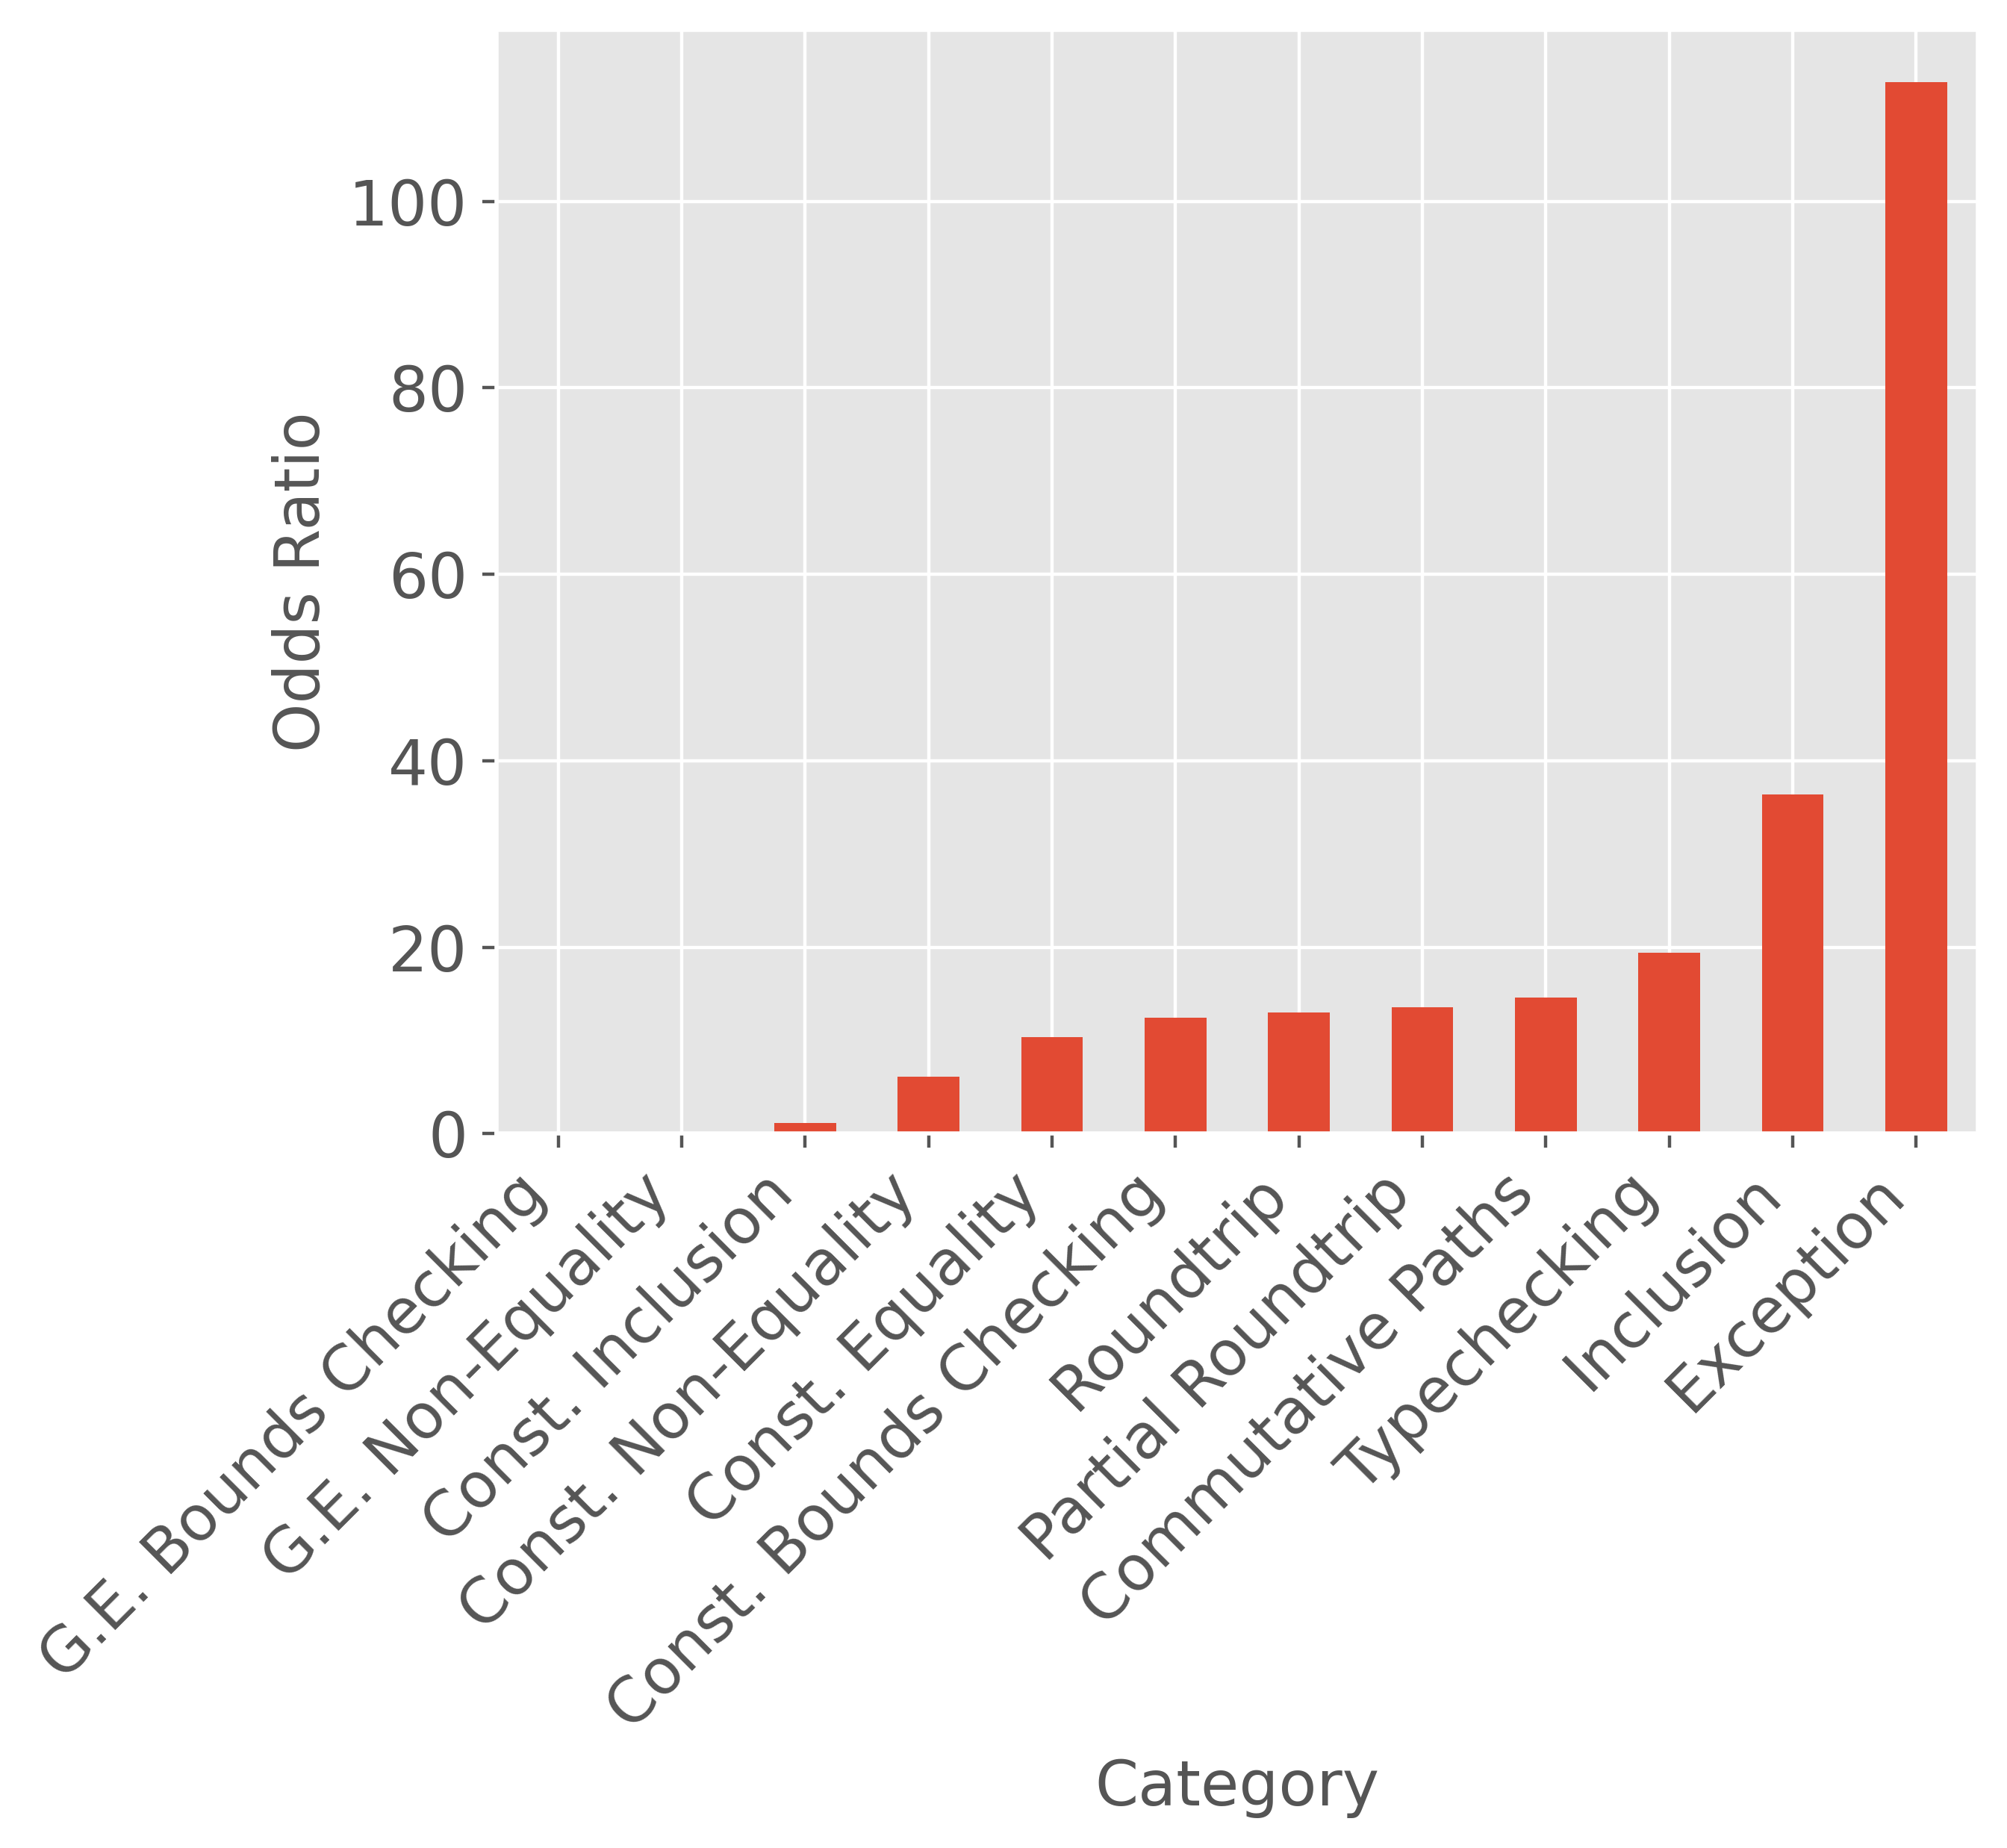

In [ ]:
plot_df = pd.read_csv('../../mutation-testing/data/mut_stats.csv')
plot_df.sort_values(inplace=True, by='odds_ratio')
ax = plot_df.plot.bar('category', 'odds_ratio', rot=90, legend=False)
ax.set_xticklabels(plot_df['category'], rotation=45, ha='right')
ax.set_ylabel('Odds Ratio', fontdict={'size': 15})
ax.set_xlabel('Category', fontdict={'size': 15})
ax

## Figure 24

In [ ]:
def get_killed_by_pbt(df):
    kbpbt = df[df["status"] == "Killed"]
    kbpbt = kbpbt[kbpbt["foundidx"] != "None"]
    return kbpbt

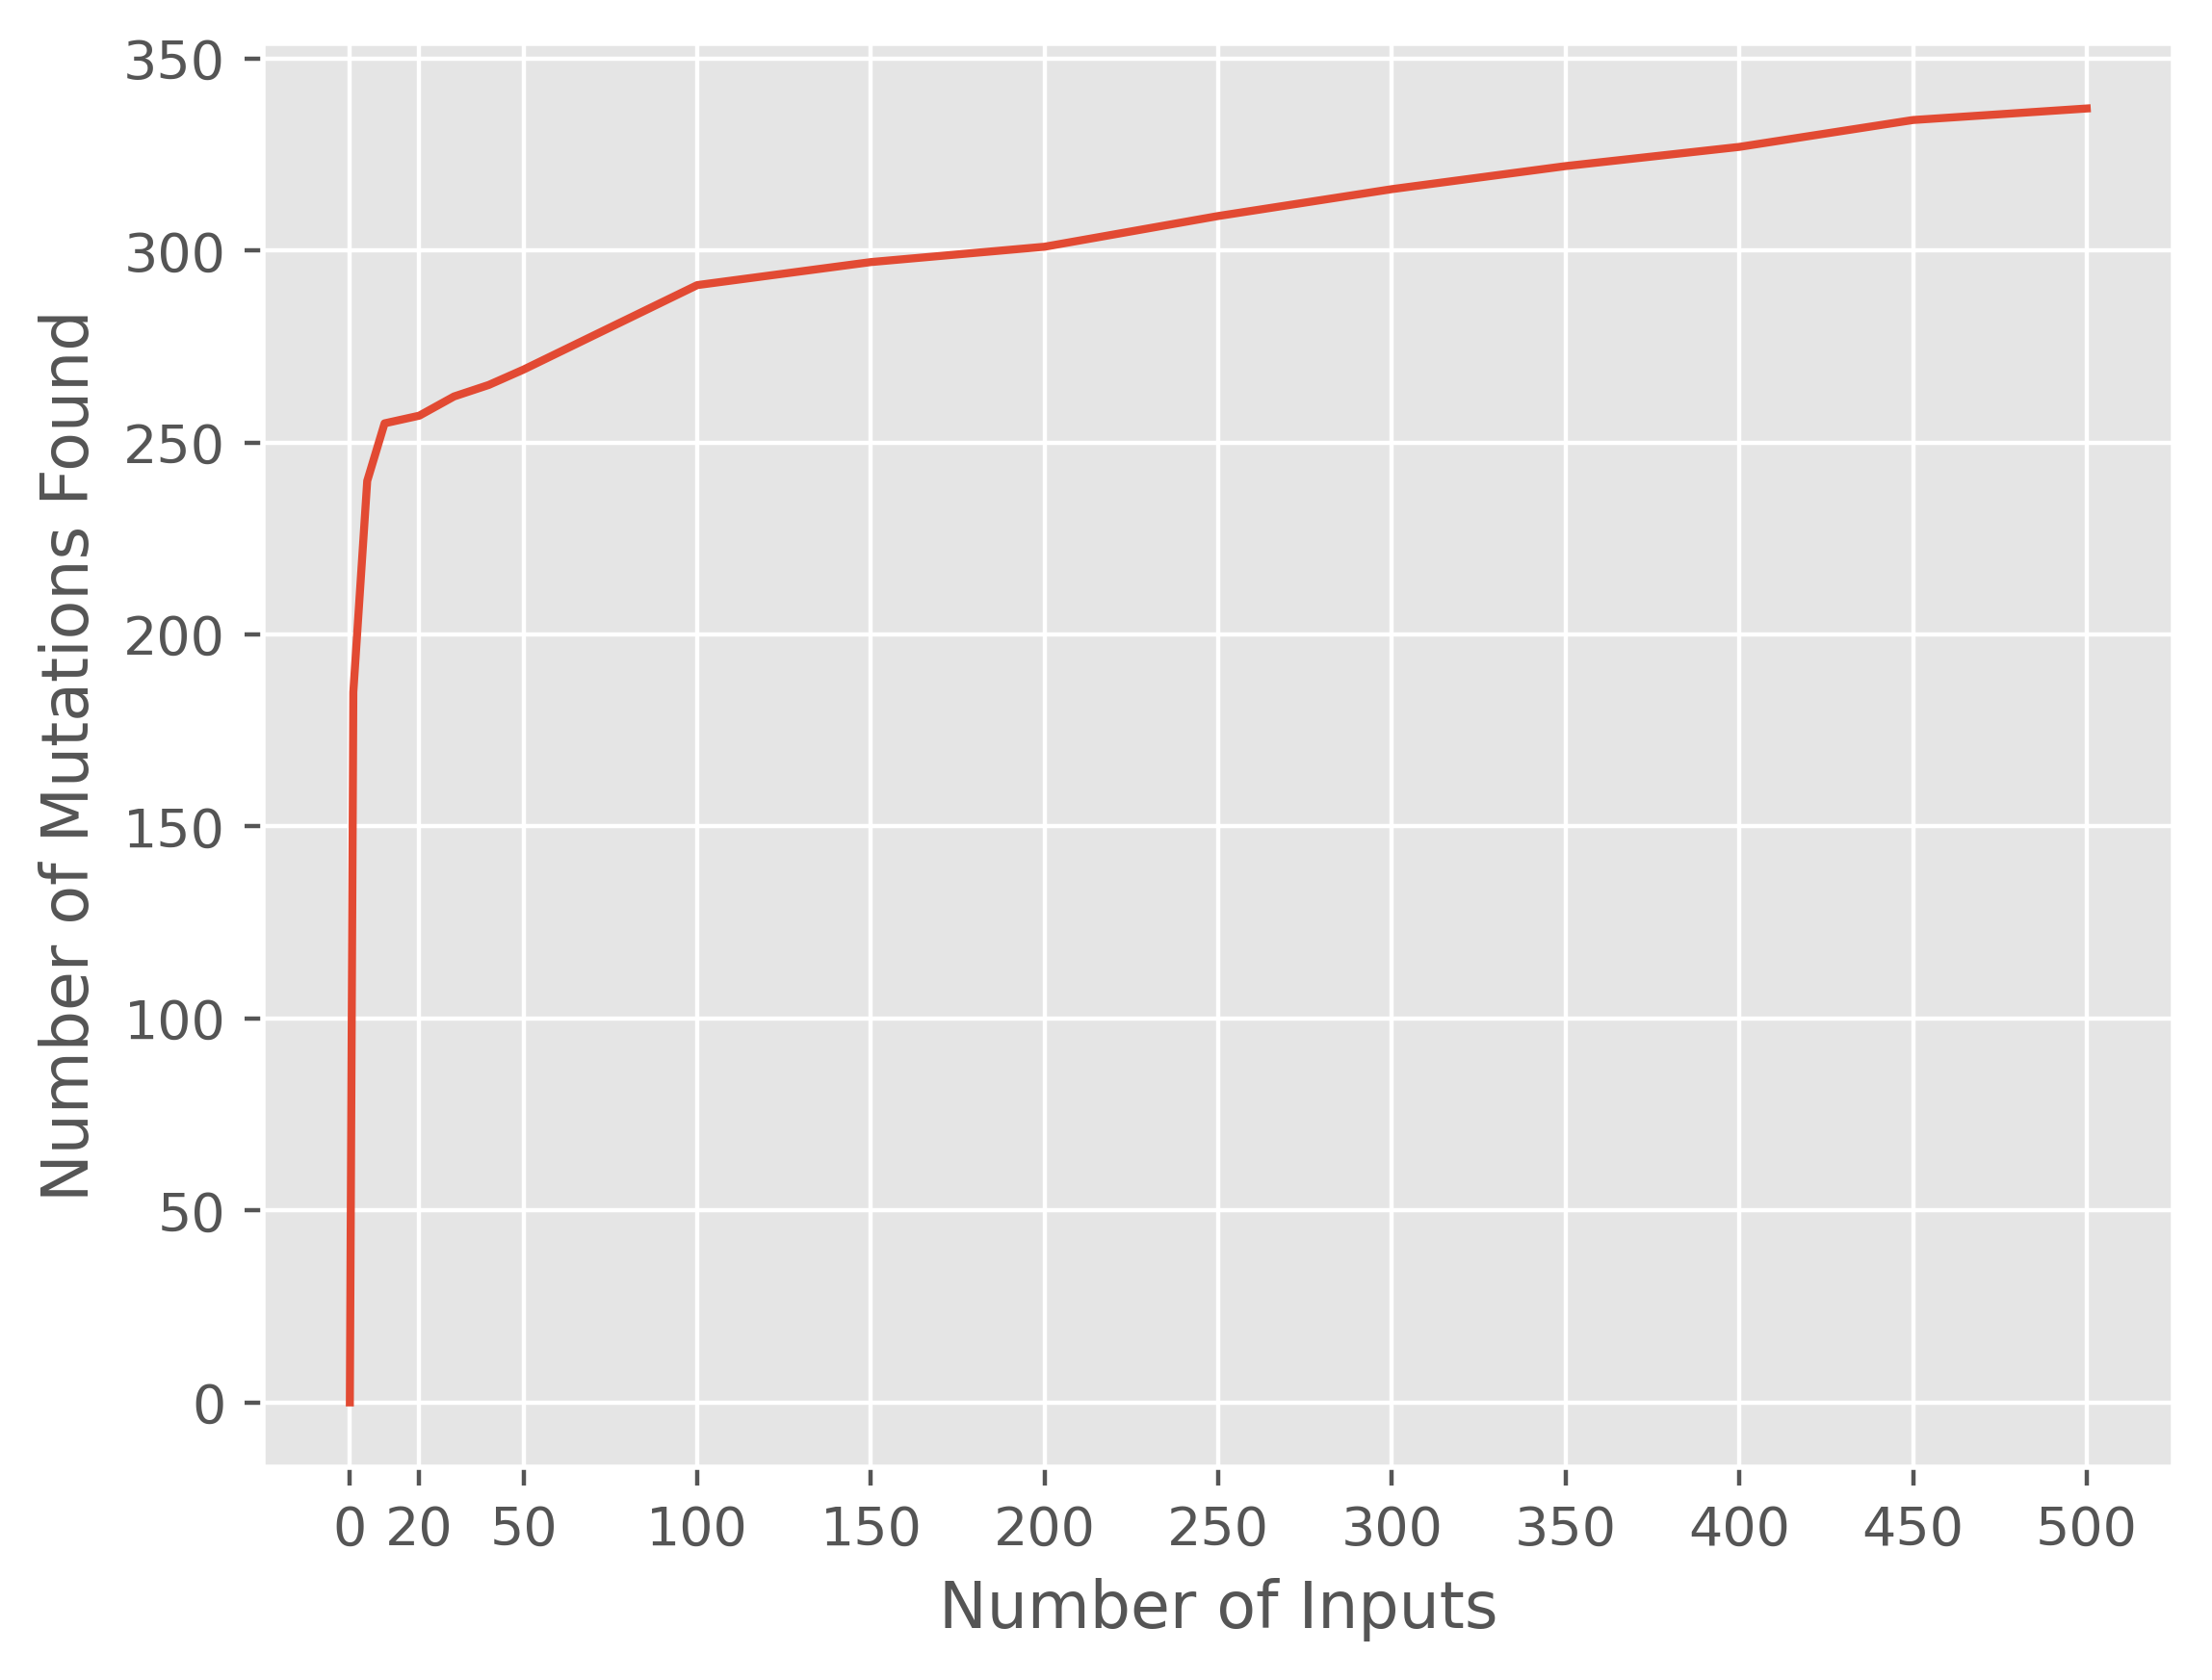

In [ ]:
df = pd.read_csv('../../mutation-testing/data/param_sweep_times_df.csv')
df_no_none = get_killed_by_pbt(df)

df_no_none["foundidx"] = df_no_none["foundidx"] + 1

df_min_num_inputs = df_no_none.groupby(["filename", "mutation"]).min()

num_killed = {}
for num_inputs in [0, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]:
    num_killed[num_inputs] = len(df_min_num_inputs[df_min_num_inputs["foundidx"]<=num_inputs])
matplotlib.rcParams["figure.dpi"] = 400
plt.plot(list(num_killed.keys()), list(num_killed.values()))
# add ticks in x axis at 20s

plt.xticks([0, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

plt.xlabel("Number of Inputs")
plt.ylabel("Number of Mutations Found")
plt.show()

## Table 5

In [ ]:
df = pd.read_csv('../../mutation-testing/data/param_sweep_times_df.csv')
# calculate the average amount of time taken for each test
df["time"] = df["time"].astype(float)
df_time = df.groupby(["filename","test"]).agg({"time": "median"}).reset_index()
df_time["time_per_100_inputs"] = df_time["time"]/500 * 100 
df_time["test_name"] = df_time["test"].apply(lambda x: x.split("::")[-1])
# tested_detections = pd.read_csv("../tested_detections.csv")
detection_cols = ['roundtrip',
       'partial_roundtrip', 'commutative', 'const_eq', 'const_inclusion',
       'inclusion', 'typecheck', 'const_bounds', 'gen_val_bounds', 'exception',
       'const_neq', 'gen_val_neq']

test_cat = []
for line in list(df_time[["filename","test_name", "time_per_100_inputs"]].to_numpy()):
    fname = line[0]
    test_name = line[1]
    time = line[2]
    if test_name in tested_detections["function"].values:
        det = tested_detections[tested_detections["function"] == test_name][detection_cols].to_dict()
        d = {"filename": fname, "test_name": test_name, "time": time}
        for key, value in det.items():
            d[key] = list(value.values())[0]
        test_cat.append(d)
test_cat_df = pd.DataFrame.from_dict(test_cat)
for col in detection_cols:
    print(col, test_cat_df[test_cat_df[col] == True]["time"].mean())


roundtrip 0.2828541666666667
partial_roundtrip 0.2621538461538461
commutative 0.3717777777777779
const_eq 1.084963768115942
const_inclusion 0.12670588235294117
inclusion 0.387
typecheck 2.51876923076923
const_bounds 0.39080000000000004
gen_val_bounds 0.6203333333333333
exception 0.08266666666666667
const_neq 0.511
gen_val_neq 0.519


## Correlations Table
- Appendix D

In [ ]:
corrs = pd.read_csv('../../mutation-testing/data/corr_table.csv')
corrs


,,Roundtrip,Partial Roundtrip,Commutative,Constant Equality,Generated-Expression Bounds Checking,Constant Bounds Checking,Generated-Expression Non-Equality,Constant Non-Equality,Typechecking,Inclusion,Constant Inclusion,Exception Raising'
0,Roundtrip,1.00,0.33,0.11,0.01,0.03,0.07,0.05,0.06,0.05,0.04,0.07,0.03
1,Partial Roundtrip,0.33,1.00,0.03,0.00,0.05,0.05,0.12,0.00,0.01,0.04,0.05,0.02
2,Commutative,0.11,0.03,1.00,0.08,0.01,0.04,0.00,0.01,0.20,0.01,0.06,0.04
3,Constant Equality,0.01,0.00,0.08,1.00,0.01,0.12,0.05,0.02,0.28,0.04,0.12,0.04
4,Generated-Expression Bounds Checking,0.03,0.05,0.01,0.01,1.00,0.09,0.12,0.03,0.16,0.02,0.02,0.02
5,Constant Bounds Checking,0.07,0.05,0.04,0.12,0.09,1.00,0.03,0.01,0.12,0.00,0.63,0.02
6,Generated-Expression Non-Equality,0.05,0.12,0.00,0.05,0.12,0.03,1.00,0.02,0.02,0.01,0.03,0.01
7,Constant Non-Equality,0.06,0.00,0.01,0.02,0.03,0.01,0.02,1.00,0.03,0.02,0.01,0.01
8,Typechecking,0.05,0.01,0.20,0.28,0.16,0.12,0.02,0.03,1.00,0.02,0.06,0.01
9,Inclusion,0.04,0.04,0.01,0.04,0.02,0.00,0.01,0.02,0.02,1.00,0.02,0.01
